Alex Piarkouski for EQ Works

UBC Computer Science 

alexey.perkovsky@icloud.com

https://github.com/alexpiarkouski

In [24]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.close("all")

1. Import data, take care of extra whitespace, strange column names, drop duplicates according to task and reindex for convenience later 

In [25]:
df = pd.read_csv('~/work/data/DataSample.csv', skipinitialspace = True)
df

,_ID,TimeSt,Country,Province,City,Latitude,Longitude
0,4516516,2017-06-21 00:00:00.143,CA,ON,Waterloo,43.49347,-80.49123
1,4516547,2017-06-21 18:00:00.193,CA,ON,London,42.93990,-81.27090
2,4516550,2017-06-21 15:00:00.287,CA,ON,Guelph,43.57760,-80.22010
3,4516600,2017-06-21 15:00:00.307,CA,ON,Stratford,43.37160,-80.97730
4,4516613,2017-06-21 15:00:00.497,CA,ON,Stratford,43.37160,-80.97730
...,...,...,...,...,...,...,...
22020,5614801,2017-06-21 12:23:07.880,CA,ON,Saint Catharines,43.16440,-79.24560
22021,5614888,2017-06-21 08:23:01.793,CA,AB,Calgary,51.02093,-114.10621
22022,5614909,2017-06-21 00:23:07.903,CA,ON,Whitby,43.88730,-78.94220
22023,5614912,2017-06-21 11:23:07.953,CA,ON,Oakville,43.49340,-79.71260


In [26]:
df = df.rename(columns={'_ID': 'ID'}) 
df.drop_duplicates(subset=['TimeSt', 'Latitude', 'Longitude'], keep=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,ID,TimeSt,Country,Province,City,Latitude,Longitude
0,4516516,2017-06-21 00:00:00.143,CA,ON,Waterloo,43.49347,-80.49123
1,4516547,2017-06-21 18:00:00.193,CA,ON,London,42.93990,-81.27090
2,4516550,2017-06-21 15:00:00.287,CA,ON,Guelph,43.57760,-80.22010
3,4516600,2017-06-21 15:00:00.307,CA,ON,Stratford,43.37160,-80.97730
4,4516613,2017-06-21 15:00:00.497,CA,ON,Stratford,43.37160,-80.97730
...,...,...,...,...,...,...,...
17968,5614689,2017-06-21 13:23:01.370,CA,ON,London,42.96110,-81.24310
17969,5614801,2017-06-21 12:23:07.880,CA,ON,Saint Catharines,43.16440,-79.24560
17970,5614909,2017-06-21 00:23:07.903,CA,ON,Whitby,43.88730,-78.94220
17971,5614912,2017-06-21 11:23:07.953,CA,ON,Oakville,43.49340,-79.71260


In [27]:
poi = pd.read_csv('~/work/data/POIList.csv', skipinitialspace=True)
poi

,POIID,Latitude,Longitude
0,POI1,53.546167,-113.485734
1,POI2,53.546167,-113.485734
2,POI3,45.521629,-73.566024
3,POI4,45.224830,-63.232729


POI1 and POI2 are duplicates, so we will drop POI2, chosen arbitrarily

In [28]:
poi.drop_duplicates(subset=['Latitude', 'Longitude'], inplace=True)
poi.reset_index(drop=True, inplace=True)
poi

,POIID,Latitude,Longitude
0,POI1,53.546167,-113.485734
1,POI3,45.521629,-73.566024
2,POI4,45.224830,-63.232729


2. Calculating haversine distances (the Earth is round!) and saving, picking POIID with the lowest distance, including as Label 

In [29]:
dfc = df.iloc[:, 5:7].to_numpy()
poic = poi.iloc[:, 1:3].to_numpy()
dfc = np.deg2rad(dfc)                     
poic = np.deg2rad(poic)                     

lat1 = dfc[:,0]                     
lng1 = dfc[:,1]         
lat2 = poic[:,0]                     
lng2 = poic[:,1] 

diff_lat = lat2[:,None] - lat1
diff_lng = lng2[:,None] - lng1
d = (np.sin(diff_lat/2))**2 + np.cos(lat2[:,None])*np.cos(lat1) * (np.sin(diff_lng/2))**2
#result = 2 * 6371 * np.arcsin(np.sqrt(d)) # alternative 
result = 2 * 6371 * np.arctan2(np.sqrt(d), np.sqrt(1-d))

df = df.assign(Label=poi.POIID.iloc[result.argmin(0)].values)
df

,ID,TimeSt,Country,Province,City,Latitude,Longitude,Label
0,4516516,2017-06-21 00:00:00.143,CA,ON,Waterloo,43.49347,-80.49123,POI3
1,4516547,2017-06-21 18:00:00.193,CA,ON,London,42.93990,-81.27090,POI3
2,4516550,2017-06-21 15:00:00.287,CA,ON,Guelph,43.57760,-80.22010,POI3
3,4516600,2017-06-21 15:00:00.307,CA,ON,Stratford,43.37160,-80.97730,POI3
4,4516613,2017-06-21 15:00:00.497,CA,ON,Stratford,43.37160,-80.97730,POI3
...,...,...,...,...,...,...,...,...
17968,5614689,2017-06-21 13:23:01.370,CA,ON,London,42.96110,-81.24310,POI3
17969,5614801,2017-06-21 12:23:07.880,CA,ON,Saint Catharines,43.16440,-79.24560,POI3
17970,5614909,2017-06-21 00:23:07.903,CA,ON,Whitby,43.88730,-78.94220,POI3
17971,5614912,2017-06-21 11:23:07.953,CA,ON,Oakville,43.49340,-79.71260,POI3


3. Data Science Track. Analysis. 

Similar operation to get distance in km from data point to closest POI

In [30]:
df = df.assign(Dist_km=result.min(0))
df

,ID,TimeSt,Country,Province,City,Latitude,Longitude,Label,Dist_km
0,4516516,2017-06-21 00:00:00.143,CA,ON,Waterloo,43.49347,-80.49123,POI3,593.413441
1,4516547,2017-06-21 18:00:00.193,CA,ON,London,42.93990,-81.27090,POI3,677.309655
2,4516550,2017-06-21 15:00:00.287,CA,ON,Guelph,43.57760,-80.22010,POI3,569.647737
3,4516600,2017-06-21 15:00:00.307,CA,ON,Stratford,43.37160,-80.97730,POI3,634.733996
4,4516613,2017-06-21 15:00:00.497,CA,ON,Stratford,43.37160,-80.97730,POI3,634.733996
...,...,...,...,...,...,...,...,...,...
17968,5614689,2017-06-21 13:23:01.370,CA,ON,London,42.96110,-81.24310,POI3,674.211228
17969,5614801,2017-06-21 12:23:07.880,CA,ON,Saint Catharines,43.16440,-79.24560,POI3,522.019302
17970,5614909,2017-06-21 00:23:07.903,CA,ON,Whitby,43.88730,-78.94220,POI3,461.995129
17971,5614912,2017-06-21 11:23:07.953,CA,ON,Oakville,43.49340,-79.71260,POI3,536.874099


In [31]:
poidata = df.groupby('Label', as_index=False)['Dist_km'].mean()
poidata = poidata.rename(columns={'Dist_km': 'DistMean'})
poidata

,Label,DistMean
0,POI1,300.714748
1,POI3,451.651149
2,POI4,514.997172


In [32]:
poi2 = df.groupby('Label', as_index=False)['Dist_km'].std()
poi2 = poi2.rename(columns={'Dist_km': 'DistStDev'})
poidata = pd.merge(poidata, poi2, on="Label")
poidata

,Label,DistMean,DistStDev
0,POI1,300.714748,388.273385
1,POI3,451.651149,223.631742
2,POI4,514.997172,1506.889971


In [33]:
poi2 = df.groupby('Label', as_index=False)['Dist_km'].max()
poi2 = poi2.rename(columns={'Dist_km': 'MaxDist'})
poidata = pd.merge(poidata, poi2, on="Label")
poidata

,Label,DistMean,DistStDev,MaxDist
0,POI1,300.714748,388.273385,11531.820832
1,POI3,451.651149,223.631742,1474.580962
2,POI4,514.997172,1506.889971,9349.572770


Some of these max distances look suspiciously large - at first glance the set of sample points seemed to be all Canadian locations. Let's check by looking at where these furthest points are for every POI

In [34]:
df.loc[df.groupby('Label', as_index=False)['Dist_km'].idxmax().iloc[:, 1]]
# "At each POI, draw a circle (with the center at the POI) that includes all of its assigned requests" 

,ID,TimeSt,Country,Province,City,Latitude,Longitude,Label,Dist_km
16617,5531633,2017-06-21 00:16:12.850,CA,QC,Montreal,6.92742,122.02588,POI1,11531.820832
15475,5460375,2017-06-21 03:09:44.450,CA,ON,Sioux Lookout,50.10040,-92.16610,POI3,1474.580962
12398,5275060,2017-06-21 21:53:39.917,CA,ON,Toronto,21.32052,40.43247,POI4,9349.572770


Found our problem! This is not the coordinates for Montreal, or Toronto (verified by hand) - our data is not the best and these are way off - cities/coordinates are mislabeled. We can filter them and other really bad outliers later. Meanwhile POI3 and Sioux Lookout seem correct

Calculating number of requests for each POI. Starting to suspect there is a more efficient way as I'm rewriting the same two code lines again

In [35]:
poi2 = df.groupby('Label', as_index=False)['Dist_km'].count()
poi2 = poi2.rename(columns={'Dist_km': 'NumDest'})
poidata = pd.merge(poidata, poi2, on="Label")
poidata

,Label,DistMean,DistStDev,MaxDist,NumDest
0,POI1,300.714748,388.273385,11531.820832,8749
1,POI3,451.651149,223.631742,1474.580962,8802
2,POI4,514.997172,1506.889971,9349.572770,422


We are told to "At each POI, draw a circle (with the center at the POI) that includes ALL of its assigned requests.", which feels wrong given some mislabeled maximum points. I can imagine this significantly increases circle areas and decreases density accuracy. If this was up to me I would get rid of outliers first (would want to be sure about the purpose of this data though), but for now moving along as is.

In [36]:
poidata['Density (requests/km^2)'] = poidata.NumDest / poidata.MaxDist**2*3.1415926
# pi approximated 
poidata

,Label,DistMean,DistStDev,MaxDist,NumDest,Density (requests/km^2)
0,POI1,300.714748,388.273385,11531.820832,8749,0.000207
1,POI3,451.651149,223.631742,1474.580962,8802,0.012717
2,POI4,514.997172,1506.889971,9349.572770,422,0.000015


4. Modelling 

Let's attempt our first naive visualization

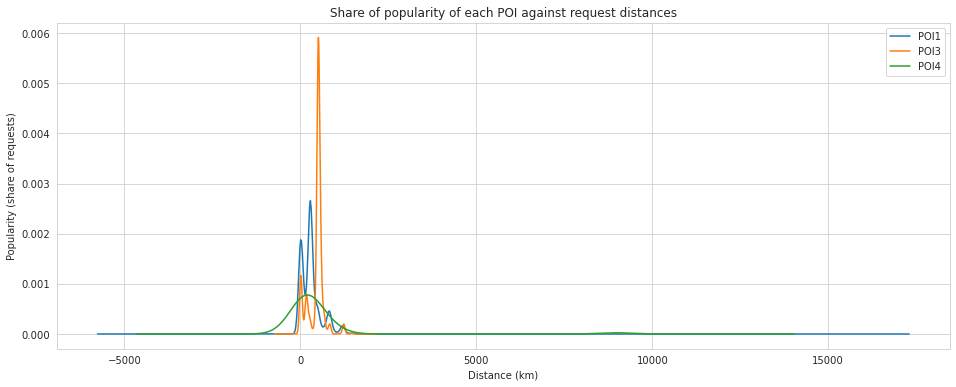

In [37]:
fig, ax = plt.subplots(figsize=(16,6))
for label, df_loop in df.groupby('Label'):
    df_loop.Dist_km.plot(kind="kde", ax=ax, label=label, title = "Share of popularity of each POI against request distances")
ax.set_xlabel("Distance (km)")
ax.set_ylabel("Popularity (share of requests)")
plt.legend()

And as predicted it turns out to be an absolute mess. The frequency plot smoothes out the data too much and might not work very well here. In the good news, the main chunk of data seems to be in one place and we can get rid of some outrageous outliers without it doing much harm.

I will keep all data points within 3 standard deviations of each POI's respective mean distance. The values in the previous table and the plot above indicate that it should contain the absolute majority of data points, and importantly not affect the dense clusters closer to POI's  

In [38]:
z=3
df_clean = df[(df.Dist_km <= poidata.DistMean.iloc[result.argmin(0)].values + z*poidata.DistStDev.iloc[result.argmin(0)].values) & (df.Dist_km >= poidata.DistMean.iloc[result.argmin(0)].values - z*poidata.DistStDev.iloc[result.argmin(0)].values)]
df_clean.reset_index(drop=True, inplace=True)
poidata_clean = df_clean.groupby('Label', as_index=False)['Dist_km'].max()
poidata_clean = poidata_clean.rename(columns={'Dist_km': 'MaxDist'})
poidata_clean

,Label,MaxDist
0,POI1,1433.906916
1,POI3,1105.614732
2,POI4,855.256289


The max distances for each POI now look much more reasonable and Canadian. Let's attempt a histogram with this cleaner data

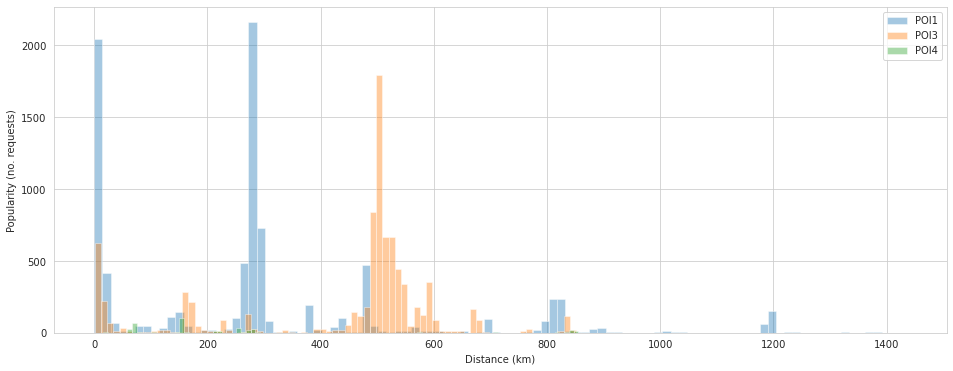

In [39]:
fig, ax = plt.subplots(figsize=(16,6))
for label, df_loop in df_clean.groupby('Label'):
    df_loop.Dist_km.plot(kind="hist", ax=ax, label=label, bins = 100, alpha = 0.4)
ax.set_xlabel("Distance (km)")
ax.set_ylabel("Popularity (no. requests)")
plt.legend()

This is still difficult to read, in part because POI4 has significantly less requests than the other two POI's. It is however already much easier to pick up trends from. I will attempt to make the values more sensitive and distinguishable around the means for each POI's distances (increase sensitivity to any values within one standard deviation around mean), normalize distance values, and split the data into three consistent plots for better readability.

In [40]:
#ran into some size issues after deleting outlier rows, and thanks to taking some time to make sure
#assigning closest POIs uses fast operations, I can afford to do it again very quickly. I will consider a 
#better solution though 
dfc = df_clean.iloc[:, 5:7].to_numpy()
dfc = np.deg2rad(dfc)                                         

lat1 = dfc[:,0]                     
lng1 = dfc[:,1]         

diff_lat = lat2[:,None] - lat1
diff_lng = lng2[:,None] - lng1
d = (np.sin(diff_lat/2))**2 + np.cos(lat2[:,None])*np.cos(lat1) * (np.sin(diff_lng/2))**2
result_clean = 2 * 6371 * np.arctan2(np.sqrt(d), np.sqrt(1-d))

Z-normalization of distance data is chosen over min-max normalization. I have found it to provide better readability for this data and it naturally allows for negative x-values without extra manipulations. That being said I have reached working applications of both in the testing process. Mean distance is represented by the 0 on the scale, while number of stDev from the mean is represented by x-axist. For further adjustments I am using the formula y = (x^n + x) * 10 / (z^n + z), where z equals to the number of standard deviations around the mean to be displayed in the plot. The first part of the formula allows for greater sensitivity and differentiabiltiy around the mean while the later half of the formula ensures the relevant number of standard deviations are displayed, and the scale never extends beyond [-10, 10]

In [41]:
n = 0.50 
df_dist_z = (df_clean.Dist_km - poidata.DistMean.iloc[result_clean.argmin(0)].values) / poidata.DistStDev.iloc[result_clean.argmin(0)].values
df_norm_z = df_clean.assign(Dist_st = (np.abs(df_dist_z)**n * np.sign(df_dist_z) + df_dist_z) * 10 / (z**n + z))
df_norm_z

,ID,TimeSt,Country,Province,City,Latitude,Longitude,Label,Dist_km,Dist_st
0,4516516,2017-06-21 00:00:00.143,CA,ON,Waterloo,43.49347,-80.49123,POI3,593.413441,3.022144
1,4516547,2017-06-21 18:00:00.193,CA,ON,London,42.93990,-81.27090,POI3,677.309655,4.255204
2,4516550,2017-06-21 15:00:00.287,CA,ON,Guelph,43.57760,-80.22010,POI3,569.647737,2.650066
3,4516600,2017-06-21 15:00:00.307,CA,ON,Stratford,43.37160,-80.97730,POI3,634.733996,3.642162
4,4516613,2017-06-21 15:00:00.497,CA,ON,Stratford,43.37160,-80.97730,POI3,634.733996,3.642162
...,...,...,...,...,...,...,...,...,...,...
17756,5614689,2017-06-21 13:23:01.370,CA,ON,London,42.96110,-81.24310,POI3,674.211228,4.211301
17757,5614801,2017-06-21 12:23:07.880,CA,ON,Saint Catharines,43.16440,-79.24560,POI3,522.019302,1.850376
17758,5614909,2017-06-21 00:23:07.903,CA,ON,Whitby,43.88730,-78.94220,POI3,461.995129,0.552241
17759,5614912,2017-06-21 11:23:07.953,CA,ON,Oakville,43.49340,-79.71260,POI3,536.874099,2.109884


array([<AxesSubplot:title={'center':'POI1'}>,
       <AxesSubplot:title={'center':'POI3'}>,
       <AxesSubplot:title={'center':'POI4'}>], dtype=object)

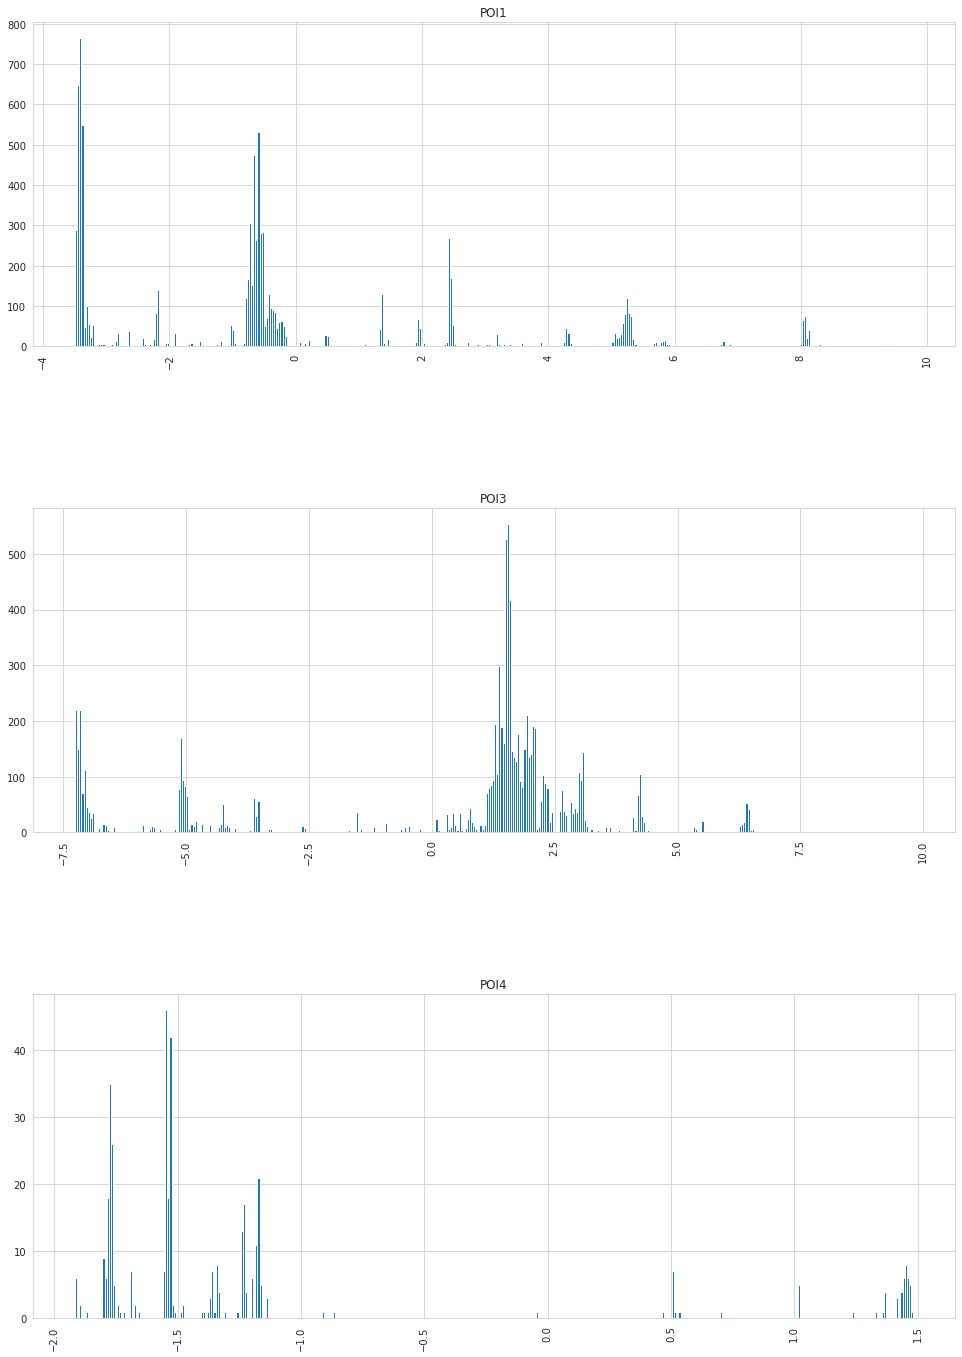

In [42]:
#Dist_st = "Distance standartized"
df_norm_z['Dist_st'].hist(by=df_norm_z['Label'], bins=400, figsize = (16,24), layout = (3,1))

In [43]:
# Min-max normalization in code below will achieve the same result, just with more manipulations
# n variable shared between the two types

#poi2 = df_m_st.groupby('Label', as_index=False)['Dist_km'].min()
#poi2 = poi2.rename(columns={'Dist_km': 'MinDist'})
#poidata_clean = pd.merge(poi2, poidata_clean, on="Label")
#df_dist_m = (((df_clean.Dist_km-poidata_clean.MinDist.iloc[result_clean.argmin(0)].values)/(poidata_clean.MaxDist.iloc[result_clean.argmin(0)].values-poidata_clean.MinDist.iloc[result_clean.argmin(0)].values))-0.5)
#df_norm_m = df_clean.assign(Dist_st=(np.abs(df_dist_z)**n * np.sign(df_dist_z) + df_dist_z) * 10 / (z**n + z))
#df_norm_m['Dist_st'].hist(by=df_norm_m['Label'], bins=400, figsize = (16,18), layout = (3,1))


Cleaned, not normalized data plotted below just for reference. Number of requests as a function of distance from POI in kms.

array([<AxesSubplot:title={'center':'POI1'}>,
       <AxesSubplot:title={'center':'POI3'}>,
       <AxesSubplot:title={'center':'POI4'}>], dtype=object)

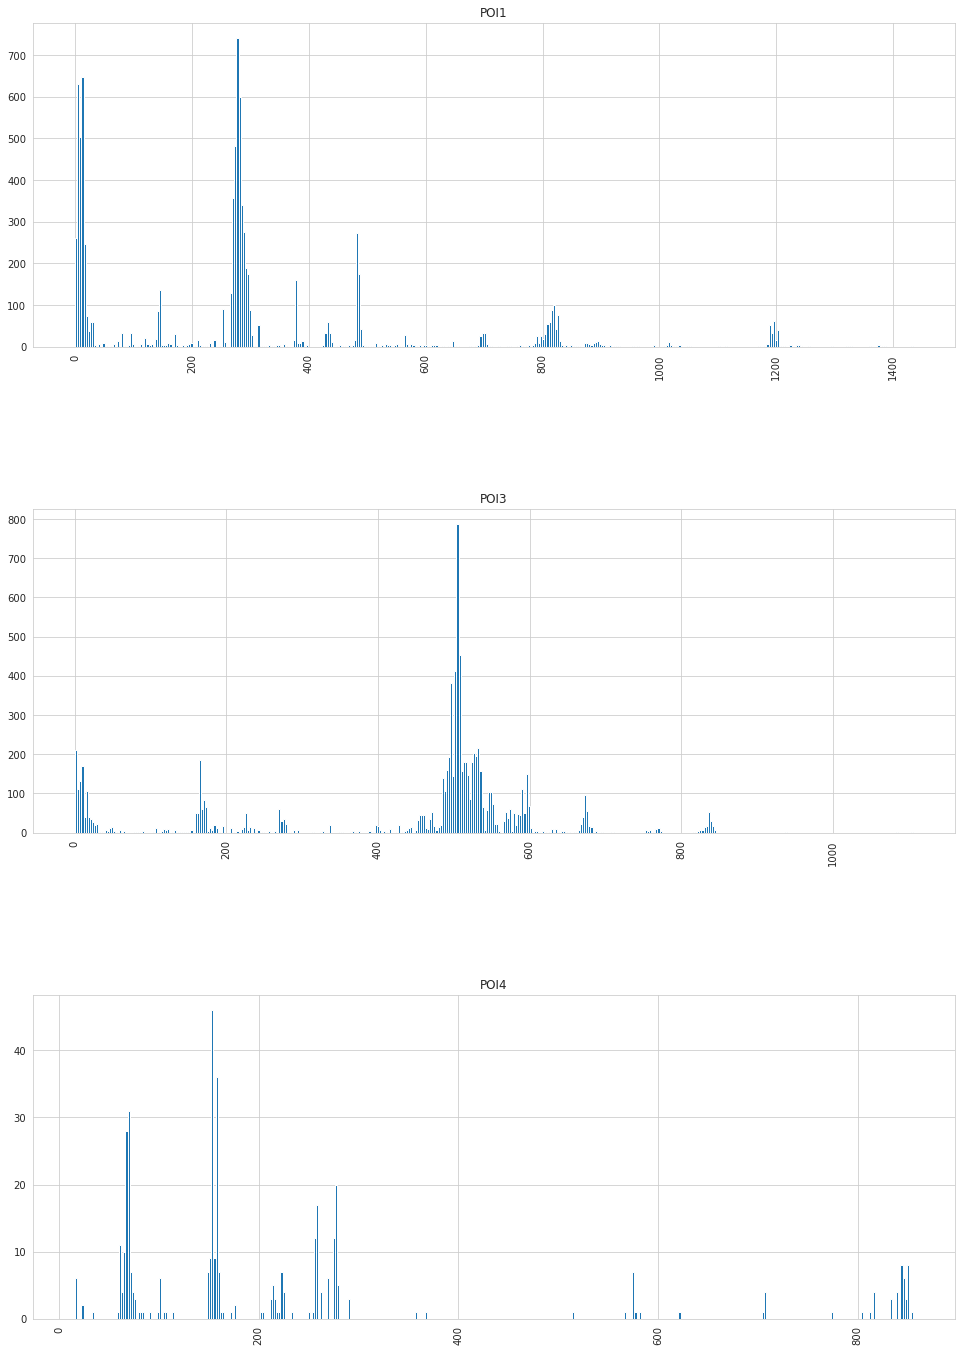

In [44]:
df_clean['Dist_km'].hist(by=df_clean['Label'], bins=400, figsize = (16,24), layout = (3,1))

As a bonus, a couple other visualizations that I've tried, but didn't like as much, inluding one histogram with all three POIs and an imporved frequency plot

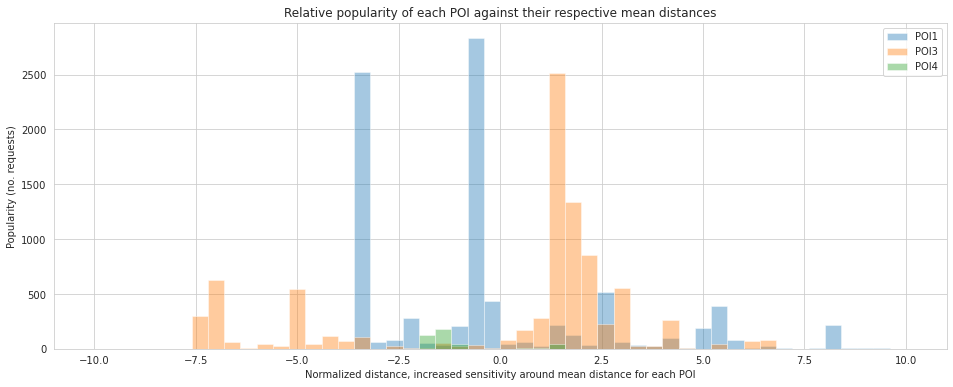

In [53]:
fig, ax = plt.subplots(figsize=(16,6))
for label, df_loop in df_norm_z.groupby('Label'):
    df_loop.Dist_st.plot(kind="hist", ax=ax, label=label, bins = 50, range = [-10, 10], alpha = 0.4, title = "Relative popularity of each POI against their respective mean distances")
ax.set_xlabel("Normalized distance, increased sensitivity around mean distance for each POI")
ax.set_ylabel("Popularity (no. requests)")
plt.legend()

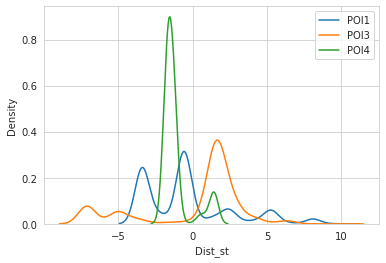

In [54]:
sns.kdeplot(df_norm_z.Dist_st[df_norm_z.Label == "POI1"],label='POI1').legend()
sns.kdeplot(df_norm_z.Dist_st[df_norm_z.Label == "POI3"],label='POI3').legend()
sns.kdeplot(df_norm_z.Dist_st[df_norm_z.Label == "POI4"],label='POI4').legend()

Thank you for your time and this open, creatively challenging task!